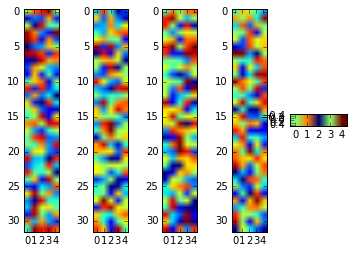

In [1]:
%matplotlib inline 

import numpy as np 
import matplotlib.pyplot as plt 

df = np.random.rand( 129, 5 )

length = 32

for index, start_pos in enumerate( range( 0, len( df ), length ) ):
    plt.subplot( 1, 5, index + 1 )
    plt.imshow( df[ start_pos : start_pos + length , : ] )

In [2]:
print list( range( 0, len( df ), length ) ) 


[0, 32, 64, 96, 128]


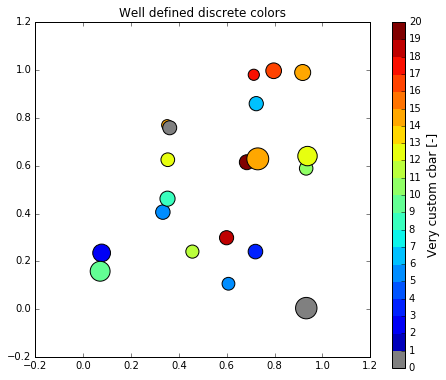

In [3]:
import matplotlib as mpl

# setup the plot
fig, ax = plt.subplots(1,1, figsize=(6,6))

# define the data
x = np.random.rand(20)
y = np.random.rand(20)
tag = np.random.randint(0,20,20)
tag[10:12] = 0 # make sure there are some 0 values to showup as grey

# define the colormap
cmap = plt.cm.jet
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# force the first color entry to be grey
cmaplist[0] = (.5,.5,.5,1.0)
# create the new map
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)

# define the bins and normalize
bounds = np.linspace(0,20,21)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# make the scatter
scat = ax.scatter(x,y,c=tag,s=np.random.randint(100,500,20),cmap=cmap, norm=norm)

# create a second axes for the colorbar
ax2 = fig.add_axes([0.95, 0.1, 0.03, 0.8])
cb = mpl.colorbar.ColorbarBase(ax2, cmap=cmap, norm=norm, spacing='proportional', ticks=bounds, boundaries=bounds, format='%1i')

ax.set_title('Well defined discrete colors')
ax2.set_ylabel('Very custom cbar [-]', size=12)

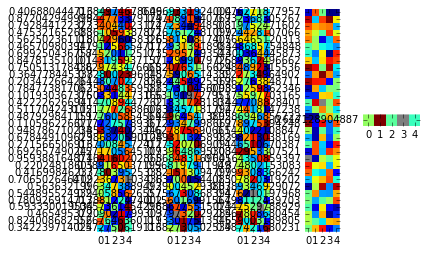

In [4]:
df = np.random.rand( 129, 5 )

length = 32
ii = range( 0, len( df ), length )

for index, start_pos in enumerate( ii ):
    my_dat = df[ start_pos : start_pos + length , : ]
    plt.subplot( 1, len( ii ), index + 1 )
    plt.box( 0 ) 
    plt.imshow( my_dat, interpolation='none', cmap=cmap )
    plt.yticks( range( len( my_dat ) ), my_dat[ : , 0 ] )

In [5]:
import pandas 
from sklearn.preprocessing import MinMaxScaler
import numpy as np 

df = pandas.read_csv( '../data_sets/experimental_data/thermo_paper_data_set.csv', index_col=0 )

# data transformation 

my_cols = [ 'expression', 'tm', 'kcat', 'km', 'kcatkm' ] 

df = df[ my_cols ] 

df[ 'tm' ] = df[ 'tm' ] - 39.93
df[ 'kcat' ] = np.log10( df[ 'kcat' ] / 880. ) 
df[ 'km' ] = np.log10( df[ 'km' ] / 5. ) 
df[ 'kcatkm' ] = np.log10( df[ 'kcatkm' ] / 174000. ) 

# sanity check 
print df.loc[ 'BglB' ]
print df.loc[ 'Q19A' ]
print df.loc[ 'R240A' ]

df.describe( include='all' ) 

expression    1.0
tm            0.0
kcat          0.0
km            0.0
kcatkm        0.0
Name: BglB, dtype: float64
expression    1.000000
tm                 NaN
kcat               NaN
km                 NaN
kcatkm       -4.199157
Name: Q19A, dtype: float64
expression    1.000000
tm           -0.030000
kcat          1.097344
km            0.590173
kcatkm        0.512085
Name: R240A, dtype: float64


/usr/local/bin/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,expression,tm,kcat,km,kcatkm
count,129.000000,69.000000,80.000000,80.000000,92.000000
mean,0.713178,-0.590725,-0.836934,0.172412,-1.449682
std,0.454041,1.618392,0.948346,0.391784,1.515885
min,0.000000,-5.680000,-2.944483,-1.096910,-4.240549
25%,0.000000,NaN,NaN,NaN,NaN
50%,1.000000,NaN,NaN,NaN,NaN
75%,1.000000,NaN,NaN,NaN,NaN
max,1.000000,2.720000,1.097344,1.251297,0.955350


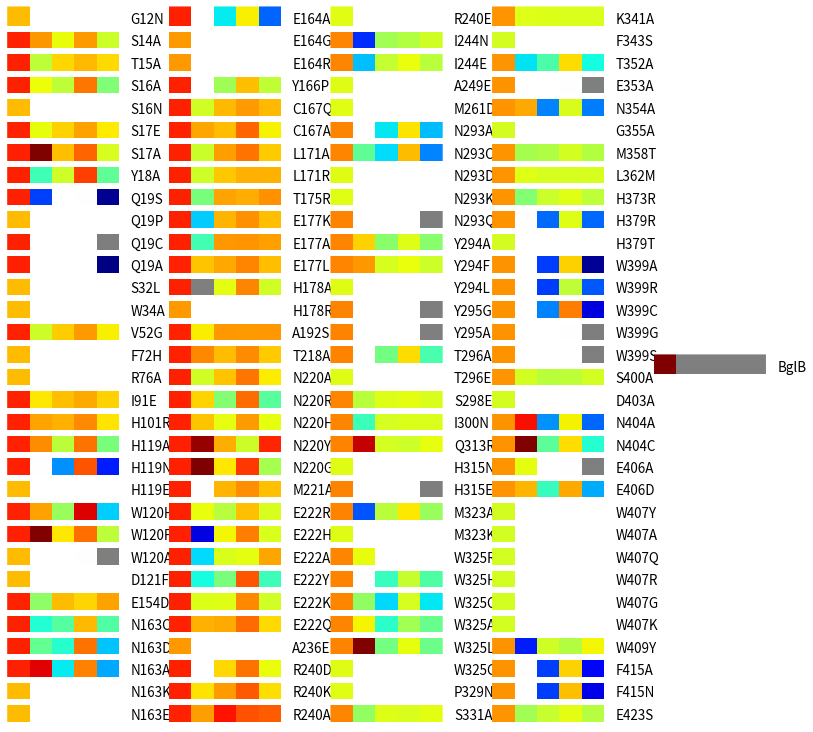

In [6]:
length = 32
ii = range( 0, len( df ), length )

plt.figure( figsize=(14,14) )
for index, start_pos in enumerate( ii ):
    my_dat = df.ix[ start_pos : start_pos + length , : ]
    plt.subplot( 1, len( ii ), index + 1 )
    plt.box( 0 ) 
    plt.tick_params( length=0 )
    plt.xticks([]); plt.yticks([])
    plt.imshow( my_dat, interpolation='none', cmap=cmap )
    #plt.yticks( range( len( my_dat ) ), my_dat.index )
    
    font = { 'fontsize': 15, 'fontname': 'Source Sans Pro', }
    for i, r in enumerate( my_dat.index ):
        plt.text( 5, i+0.25, r, fontdict=font )
        plt.plot( [ -.5, len( ii ) + .5 ], [ i+0.5, i+0.5 ], c='w', lw=6 ) # cell borders

In [17]:
print help( cmap.from_list )
               
my_colors = [
    ( .11, .19, .36 ), # deep blue
    ( .46, .57, .66 ), # medium blue
    ( .71, .76, .80 ), # light blue 
    ( .92, .92, .92 ), # grey 
    ( .92, .88, .74 ), # light yellow
    ( .88, .80, .51 ), # medium yellow 
    ( .81, .63, 0. ),  # deep yellow 
]

my_vals = [
    ( 1, ( .11, .19, .36 ) ), # deep blue
    ( .9, ( .46, .57, .66 ) ), # medium blue
    ( .8, ( .71, .76, .80 ) ), # light blue 
    ( .7, ( .92, .92, .92 ) ), # grey 
    ( .1, ( .92, .88, .74 ) ), # light yellow
    ( .01, ( .88, .80, .51 ) ), # medium yellow 
    ( 0, ( .81, .63, 0. ) ),  # deep yellow 
]

my_cmap = cmap.from_list( 'my_cmap', my_colors, N=len(my_colors), gamma=1 )
plt.imshow( np.random.rand( 10, 10 ), interpolation='none', cmap=my_cmap ) 

my_c = cmap.from_list( 'my_c', my_vals, N=len(my_vals), gamma=1.)
plt.imshow( np.random.rand( 10, 10 ), interpolation='none', cmap=my_c ) 

Help on function from_list in module matplotlib.colors:

from_list(name, colors, N=256, gamma=1.0)
    Make a linear segmented colormap with *name* from a sequence
    of *colors* which evenly transitions from colors[0] at val=0
    to colors[-1] at val=1.  *N* is the number of rgb quantization
    levels.
    Alternatively, a list of (value, color) tuples can be given
    to divide the range unevenly.

None


Error in callback <function post_execute at 0x105d1e050> (for post_execute):


ValueError: data mapping points must start with x=0. and end with x=1

ValueError: data mapping points must start with x=0. and end with x=1

In [ ]:
print cmap.from_list

In [19]:
print help( plt.imshow ) 

Help on function imshow in module matplotlib.pyplot:

imshow(X, cmap=None, norm=None, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, shape=None, filternorm=1, filterrad=4.0, imlim=None, resample=None, url=None, hold=None, data=None, **kwargs)
    Display an image on the axes.
    
    Parameters
    -----------
    X : array_like, shape (n, m) or (n, m, 3) or (n, m, 4)
        Display the image in `X` to current axes.  `X` may be a float
        array, a uint8 array or a PIL image. If `X` is an array, it
        can have the following shapes:
    
        - MxN -- luminance (grayscale, float array only)
        - MxNx3 -- RGB (float or uint8 array)
        - MxNx4 -- RGBA (float or uint8 array)
    
        The value for each component of MxNx3 and MxNx4 float arrays
        should be in the range 0.0 to 1.0; MxN float arrays may be
        normalised.
    
    cmap : `~matplotlib.colors.Colormap`, optional, default: None
        If None, d

In [21]:
import matplotlib
print help( matplotlib.colors.Normalize )

Help on class Normalize in module matplotlib.colors:

class Normalize(__builtin__.object)
 |  A class which, when called, can normalize data into
 |  the ``[0.0, 1.0]`` interval.
 |  
 |  Methods defined here:
 |  
 |  __call__(self, value, clip=None)
 |      Normalize *value* data in the ``[vmin, vmax]`` interval into
 |      the ``[0.0, 1.0]`` interval and return it.  *clip* defaults
 |      to *self.clip* (which defaults to *False*).  If not already
 |      initialized, *vmin* and *vmax* are initialized using
 |      *autoscale_None(value)*.
 |  
 |  __init__(self, vmin=None, vmax=None, clip=False)
 |      If *vmin* or *vmax* is not given, they are initialized from the
 |      minimum and maximum value respectively of the first input
 |      processed.  That is, *__call__(A)* calls *autoscale_None(A)*.
 |      If *clip* is *True* and the given value falls outside the range,
 |      the returned value will be 0 or 1, whichever is closer.
 |      Returns 0 if::
 |      
 |          vm

In [23]:
# a much more informative way to write this code

def f(x):
    def g(y):
        return x + y
    return g

def h(x):
    return lambda y: x + y

a = f(1) # returns: 1 + y 
b = h(1) # returns: 1 + y 
print f(1)(5)
print h(1)(5)

6
6
